In [1]:
import pandas as pd
df = pd.read_excel("C:\DataSets\house_data_1000_records.xlsx")


In [2]:
from sklearn.model_selection import train_test_split
X = df.drop('Sold Price', axis=1)
y = df['Sold Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select categorical columns
categorical_columns = ['Suburb']

# Define OneHotEncoder for categorical columns
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Apply encoding
X_encoded = column_transformer.fit_transform(X)



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


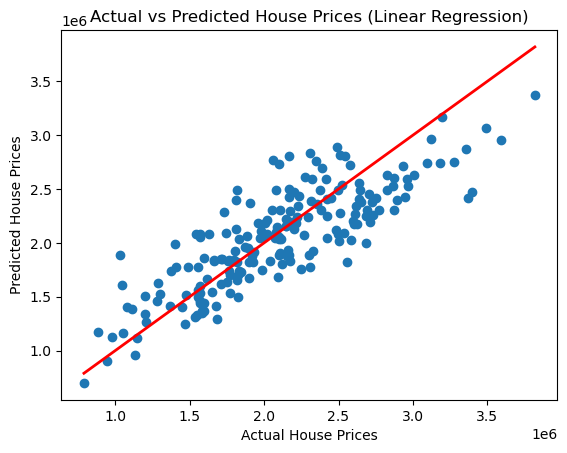

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X_encoded is your encoded dataset and y is the target variable (Sold Price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line

# Add labels and title
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()



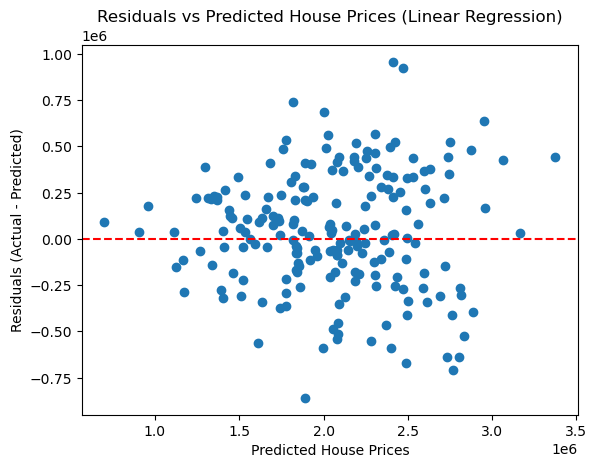

In [9]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted House Prices (Linear Regression)")
plt.show()


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Assuming X_encoded is your encoded dataset and y is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # Fit the model with training data

# Now you can make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 356978.215
MSE: 204264717323.505
RMSE: 451956.543622841
